In [0]:
# pip install tensorflow==1.14

In [0]:
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout, Activation, Flatten ,Embedding,Reshape
from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU ,regularizers
from keras.optimizers import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split


In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [6]:
cd /content/gdrive/My\ Drive/faraji/digikala

/content/gdrive/My Drive/faraji/digikala


In [0]:
dic={0:'like_dislike' ,1:'like_verydislike',2:'verylike_dislike',3:'verylike_verydislike'}

In [0]:
df_cln= pd.read_csv('balance_classified.csv')

In [0]:
X = df_cln['comment']
X_train_0 = df_cln[ df_cln['class']==0]['comment']
X_train_1 = df_cln[ df_cln['class']==2]['comment']

In [0]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)


X_train_0 = tokenizer.texts_to_sequences(X_train_0)
X_train_1 = tokenizer.texts_to_sequences(X_train_1)

X_train_0 = pad_sequences(X_train_0, padding = "post", maxlen =30)
X_train_1 = pad_sequences(X_train_1, padding = "post", maxlen =30)



In [0]:
X_train=np.concatenate([X_train_0,X_train_1])
y_train_0=np.zeros(X_train_0.shape[0])
y_train_1=np.ones(X_train_1.shape[0])
y_train=np.concatenate([y_train_0,y_train_1])

In [0]:
y_train =tf.keras.utils. to_categorical(y_train)

In [13]:
print(X_train.shape) ,print(y_train.shape)

(60716, 30)
(60716, 2)


(None, None)

In [0]:
X_trainn, X_valid, y_trainn, y_valid = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In [15]:
model = Sequential()
model.add(Embedding(input_dim =53019, output_dim = 30, input_length = 30,name='embed'))
model.add(Dense(50,name='layer11'))

model.add(Conv1D(filters = 150, kernel_size = ( 8), strides = 1, padding = "valid",name='layer_1'))

model.add(Dropout(0.2,name='layer_2'))

model.add(GlobalMaxPooling1D(name='layer_3'))
model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'
,kernel_regularizer=regularizers.l1(0.01),bias_regularizer=regularizers.l2(0.01) ,name='layer_4'))

model.add(BatchNormalization(name='layer_5'))
model.add(Dropout(0.2,name='layer_6'))
model.add(Dense(10, activation = 'relu',name='layer_7'))
model.add(BatchNormalization(name='layer_8'))
model.add(Dropout(0.2,name='layer_9'))
model.add(Dense(2,activation='softmax' ,name='layer_10'))

adam =Adam()


model.compile(loss='binary_crossentropy', optimizer=adam , metrics=['accuracy'])
model.summary ()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embed (Embedding)            (None, 30, 30)            1590570   
_________________________________________________________________
layer11 (Dense)              (None, 30, 50)            1550      
_________________________________________________________________
layer_1 (Conv1D)             (None, 23, 150)           60150     
_________________________________________________________________
layer_2 (Dropout)            (None, 23, 150)           0         
_________________________________________________________________
layer_3 (GlobalMaxPooling1D) (None, 150)               0         
_________________________________________________________________
layer_4 (Dense)              (None, 50)                7550      
_________________________________________________________________
layer_5 (BatchNormalization) (None, 50)               

In [0]:
history = model.fit(X_trainn,
                  y_trainn,
                    batch_size = 50,
                    validation_data=(X_valid,y_valid),
                    epochs = 40, verbose = 1
                    )

Train on 40679 samples, validate on 20037 samples
Epoch 1/40
40679/40679 [==============================] - 13s 325us/step - loss: 0.3271 - accuracy: 0.8844 - val_loss: 1.1480 - val_accuracy: 0.6108
Epoch 2/40
40679/40679 [==============================] - 13s 325us/step - loss: 0.3036 - accuracy: 0.8971 - val_loss: 0.7748 - val_accuracy: 0.7097
Epoch 3/40
40679/40679 [==============================] - 13s 327us/step - loss: 0.2722 - accuracy: 0.9089 - val_loss: 0.9646 - val_accuracy: 0.6682
Epoch 4/40
40679/40679 [==============================] - 13s 325us/step - loss: 0.2776 - accuracy: 0.9130 - val_loss: 1.7617 - val_accuracy: 0.5577
Epoch 5/40
40679/40679 [==============================] - 13s 324us/step - loss: 0.2835 - accuracy: 0.9158 - val_loss: 0.7403 - val_accuracy: 0.7056
Epoch 6/40
40679/40679 [==============================] - 13s 325us/step - loss: 0.2677 - accuracy: 0.9220 - val_loss: 0.8864 - val_accuracy: 0.6971
Epoch 7/40
40679/40679 [==============================] 

In [0]:
model.save_weights("model_bi_new.h5")

In [0]:
noise=np.random.randint(1,53019,(60000,30))
X_train=noise[:50000]
X_valid=noise[50000:]
y_train=np.ones(X_train.shape[0])
y_valid=np.ones(X_valid.shape[0])


In [0]:
y_valid =tf.keras.utils. to_categorical(y_valid)
y_train =tf.keras.utils. to_categorical(y_train)

In [18]:
print(X_train.shape ) ,print(X_valid.shape ) ,print(y_train.shape ) ,print(y_valid.shape )

(50000, 30)
(10000, 30)
(50000, 2)
(10000, 2)


(None, None, None, None)

In [0]:
model3 =Sequential()
model3.add(Embedding(input_dim =53019, output_dim = 30, input_length = 30,name='embed',trainable=False))

model3.add(Dense(36,input_shape=(30,),activation='sigmoid'))
model3.add(BatchNormalization())

# model3.add(LSTM(256))

model3.add(Dense(100, activation='sigmoid'))
model3.add(BatchNormalization())


model3.add(Dropout(0.2))
model3.add(Flatten())
model3.add(Dense(30*30, activation='sigmoid',name='generate_layer1'))
model3.add(BatchNormalization())


model3.add(Reshape((30, 30),input_shape=(900,1),name='generate_layer2'))

model3.add(Dense(50,name='layer11',trainable=False))
model3.add(Conv1D(filters = 150, kernel_size = ( 8), strides = 1, padding = "valid",name='layer_1',trainable=False))

model3.add(Dropout(0.2,name='layer_2',trainable=False))

model3.add(GlobalMaxPooling1D(name='layer_3',trainable=False))
model3.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'
,kernel_regularizer=regularizers.l1(0.01),bias_regularizer=regularizers.l2(0.01) ,name='layer_4',trainable=False))

model3.add(BatchNormalization(name='layer_5',trainable=False))
model3.add(Dropout(0.2,name='layer_6',trainable=False))
model3.add(Dense(10, activation = 'relu',name='layer_7',trainable=False))
model3.add(BatchNormalization(name='layer_8',trainable=False))
model3.add(Dropout(0.2,name='layer_9',trainable=False))
model3.add(Dense(2,activation='sigmoid' ,name='layer_10',trainable=False))

adam =Adam()


model3.compile(loss='binary_crossentropy', optimizer=adam , metrics=['accuracy'])
# model3.summary ()

In [0]:
# from keras.utils import plot_model
# plot_model(model_first, to_file='model_first.png')

In [0]:
model3.load_weights('model_bi_new.h5', by_name=True)

In [22]:
model3.get_layer(name='embed').get_weights()
model3.get_layer(name='layer_1').get_weights()
model3.get_layer(name='layer_2').get_weights()
model3.get_layer(name='layer_3').get_weights()
model3.get_layer(name='layer_4').get_weights()
model3.get_layer(name='layer_5').get_weights()
model3.get_layer(name='layer_6').get_weights()
model3.get_layer(name='layer_7').get_weights()
model3.get_layer(name='layer_8').get_weights()
model3.get_layer(name='layer_9').get_weights()
model3.get_layer(name='layer_10').get_weights()
model3.get_layer(name='layer11').get_weights()


[array([[ 0.37035984, -0.3895158 , -0.186658  , ...,  0.27289444,
         -0.09339921,  0.07944864],
        [-0.18380204,  0.2972864 , -0.39790744, ..., -0.13993327,
         -0.22881258,  0.02462423],
        [ 0.32097578,  0.03848574, -0.00578056, ...,  0.3074803 ,
         -0.17577103, -0.19914186],
        ...,
        [ 0.0272833 , -0.12567367,  0.30690628, ...,  0.22940537,
          0.25295922, -0.17961444],
        [ 0.03132477, -0.08060131, -0.6305765 , ..., -0.36037934,
         -0.33503437, -0.1418104 ],
        [ 0.08426013,  0.15169744,  0.20544487, ...,  0.20439593,
          0.25276202,  0.2276799 ]], dtype=float32),
 array([-0.05803696,  0.13307895, -0.0645436 , -0.10004132, -0.05186018,
        -0.05990536,  0.00844217,  0.10366041, -0.11667793, -0.05636017,
        -0.11352997, -0.01516139,  0.06143496,  0.0755811 , -0.09250066,
         0.16776118, -0.01506557, -0.07338006,  0.07985251, -0.09555125,
         0.03963905, -0.13240816, -0.18026876, -0.08401712,  0.188

In [0]:
history = model3.fit(X_train,
                  y_train,
                    validation_split = 0.3,
                    epochs = 10, verbose = 1
                    )

Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 28s 797us/step - loss: 1.2909 - accuracy: 0.6711 - val_loss: 0.6666 - val_accuracy: 0.9729
Epoch 2/10
35000/35000 [==============================] - 27s 762us/step - loss: 1.2233 - accuracy: 0.6568 - val_loss: 0.9826 - val_accuracy: 0.9588
Epoch 3/10
35000/35000 [==============================] - 27s 765us/step - loss: 1.2074 - accuracy: 0.6322 - val_loss: 1.0022 - val_accuracy: 0.9605
Epoch 4/10
35000/35000 [==============================] - 27s 763us/step - loss: 1.2177 - accuracy: 0.6275 - val_loss: 1.4733 - val_accuracy: 0.9453
Epoch 5/10
35000/35000 [==============================] - 28s 814us/step - loss: 1.2032 - accuracy: 0.6350 - val_loss: 0.9005 - val_accuracy: 0.9658
Epoch 6/10
35000/35000 [==============================] - 27s 767us/step - loss: 1.2073 - accuracy: 0.6480 - val_loss: 1.3440 - val_accuracy: 0.9498
Epoch 7/10
35000/35000 [==============================] 

In [0]:
model3.evaluate(X_valid,y_valid)

10000/10000 [==============================] - 2s 183us/step


[0.5004200469672679, 0.9807000160217285]

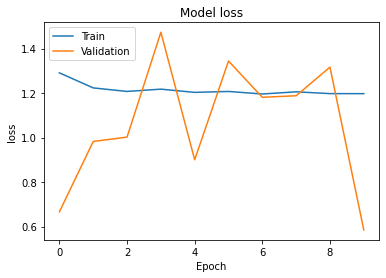

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'] , loc='upper left')
plt.show()

In [0]:
model3.save_weights("model33333_final.h5")

In [0]:
model3.load_weights('model33333_final.h5')

In [0]:
def left_inverse_matrix(m):
    mt=m.transpose()
    mul=np.dot(mt,m)
    mul_2=np.linalg.inv(mul)
    mul_3=np.dot(mul_2,mt)
    return mul_3


def right_inverse_matrix(m):
    mt=m.transpose()
    mul=np.dot(m,mt)
    mul_2=np.linalg.inv(mul)
    mul_3=np.dot(mt,mul_2)
    return mul_3

In [90]:
embed_matrix=model3.get_layer(name='embed').get_weights()
print(embed_matrix[0].shape)
embed_matrix=embed_matrix[0]


(53019, 30)


In [91]:
layer_name = 'generate_layer2'
intermediate_layer_model = Model(input = model3.input, output = model3.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(X_valid[3000:3001])
c=intermediate_output.reshape(30,30)
print(c.shape)

(30, 30)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("em..., outputs=Tensor("ge...)`
  


In [29]:
a=np.array([[2 ,3 ],[5,6],[7,8]])
inv_a=left_inverse_matrix(a)
np.dot(inv_a,a)

array([[ 1.00000000e+00,  6.03961325e-14],
       [-3.19744231e-14,  1.00000000e+00]])

In [0]:
inv_embed_matrix=left_inverse_matrix(embed_matrix)
# np.dot(inv_embed_matrix,embed_matrix)

In [93]:
sentence_matrix=np.dot(c,inv_embed_matrix)
e=np.absolute(sentence_matrix)
np.min(e[10]),np.max(e[10])

(1.5566096e-08, 0.008383908)

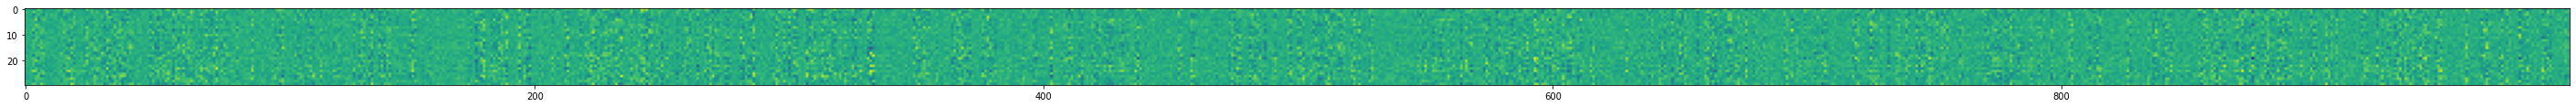

In [0]:
fig,ax = plt.subplots(figsize=(50,400))
ax.imshow(sentence_matrix[:,40000:41000])
# plt.savefig('sentence_plot.png')

In [0]:
b=[[6693,13596,2691,14037,1400,6364,2665,1420,16646,3174,12503,7555,1897,3857,11167,18787,21731,16667,1244,7360]]

In [0]:
ls=[]
for i in range(0,20):
    max_pro=np.max(e[i])
    word_index=np.where(e[i]==max_pro)
    ls.append(list(word_index))

In [0]:
a=[[5913,3528,32662,10407,15720,1785,10944,6217,8831,41251,48874,7492,9075,3516,32476,4240,7719,2592,16627,3894]]
a

[[5913,
  3528,
  32662,
  10407,
  15720,
  1785,
  10944,
  6217,
  8831,
  41251,
  48874,
  7492,
  9075,
  3516,
  32476,
  4240,
  7719,
  2592,
  16627,
  3894]]

In [0]:
reverse_word_map = dict(map(reversed, tokenizer.word_index.items()))

In [0]:
def sequence_to_text(list_of_indices):
    # Looking up words in dictionary
    words = [reverse_word_map.get(letter) for letter in list_of_indices]
    return(words)

# Creating texts 
my_texts = list(map(sequence_to_text, a))

my_texts

[['دماش',
  'عالییه',
  'دیجیکالاییم',
  'البت',
  'چسپندگی',
  'استحکام',
  'یسری',
  '۶ماه',
  'اسپلیتر',
  'عسلشه',
  'بازدهه',
  'قیمش',
  'چنگالش',
  'جبران',
  'همراهانش',
  'نظرمن',
  'مدادی',
  'اقدام',
  'جیغهه',
  'یورو']]

In [0]:
my_texts = list(map(sequence_to_text, b))
my_texts

[['ضعیفیه',
  'خریدکالا۲۴',
  'هیجان',
  'انکیز',
  'تاحالا',
  'ومناسب',
  'پشیمانم',
  'پک',
  'موزد',
  'معرکه',
  '۹۴۵۰',
  'تواین',
  'حجمش',
  'داشتنیه',
  'ارزشمندی',
  'چتری',
  'سولفاتش',
  'سامسونگش',
  'قشنگی',
  'ششم']]

In [0]:
ls=[]
for i in range(0,30):
    max_pro=np.max(e[i])
    word_index=np.where(e[i]==max_pro)
    ls.append(list(word_index))

In [0]:
ls2 = np.array(ls).tolist()

In [39]:
def sequence_to_text(list_of_indices):
    # Looking up words in dictionary
    words = [reverse_word_map.get(letter) for letter in list_of_indices]
    return(words)

# Creating texts 
my_texts = list(map(sequence_to_text, flatList))

my_texts

[['پولمو'],
 ['انصافن'],
 ['مان'],
 ['افتابی'],
 ['افتابی'],
 ['موافق'],
 ['افتابی'],
 ['باحالیه'],
 ['موافق'],
 ['اسپلیتر'],
 ['خوشکل'],
 ['موافق'],
 ['آشپزی'],
 ['جی۷'],
 ['چنینی'],
 ['بنزیننش'],
 ['افتابی'],
 ['چنگالش'],
 ['وتو'],
 ['اسپلیتر'],
 ['انصافن'],
 ['افتابی'],
 ['بادوام'],
 ['استاندار'],
 ['مخصوصن'],
 ['ساویج'],
 ['مخصوصن'],
 ['وتو'],
 ['خوشکل'],
 ['تفلون']]

In [96]:
flatList = []
for elem in ls2:
    flatList.extend(elem)
 
print('Flat List : ', flatList)

Flat List :  [[9075], [20493], [31733], [8831], [3996], [21131], [42577], [48843], [5646], [8729], [16667], [15434], [32331], [10467], [43020], [14188], [26261], [3644], [5311], [26261], [6217], [8917], [19783], [5451], [5277], [2515], [3111], [31844], [3709], [11597]]


In [0]:
reverse_word_map = dict(map(reversed, tokenizer.word_index.items()))

In [79]:
flatList2 = []
for elem in flatList:
    flatList2.extend(elem)
 
print('Flat List : ', flatList2)

Flat List :  [8825, 13596, 16528, 3475, 6976, 19444, 3253, 8524, 31463, 6540, 2600, 7630, 1754, 32331, 5723, 25943, 16608, 1442, 3321, 3528, 40875, 6976, 7555, 3874, 14082, 29969, 914, 12957, 11673, 22204]


In [48]:
my_texts = list(map(sequence_to_text, flatList))
my_texts

[['پولمو'],
 ['انصافن'],
 ['مان'],
 ['افتابی'],
 ['افتابی'],
 ['موافق'],
 ['افتابی'],
 ['باحالیه'],
 ['موافق'],
 ['اسپلیتر'],
 ['خوشکل'],
 ['موافق'],
 ['آشپزی'],
 ['جی۷'],
 ['چنینی'],
 ['بنزیننش'],
 ['افتابی'],
 ['چنگالش'],
 ['وتو'],
 ['اسپلیتر'],
 ['انصافن'],
 ['افتابی'],
 ['بادوام'],
 ['استاندار'],
 ['مخصوصن'],
 ['ساویج'],
 ['مخصوصن'],
 ['وتو'],
 ['خوشکل'],
 ['تفلون']]

In [80]:
my_texts = list(map(sequence_to_text, flatList))
my_texts

[['اندونزی'],
 ['خریدکالا۲۴'],
 ['امکانتش'],
 ['غلط'],
 ['جاروی'],
 ['قابلیتهاش'],
 ['پاییز'],
 ['دانم'],
 ['کوهنوری'],
 ['بدنسازی'],
 ['خریدتون'],
 ['بهترینش'],
 ['ساعتی'],
 ['یکسالهاین'],
 ['تصاویرش'],
 ['متقبل'],
 ['نرو'],
 ['نقص'],
 ['پوستو'],
 ['عالییه'],
 ['میشونه'],
 ['جاروی'],
 ['تواین'],
 ['میرسد'],
 ['چسبونه'],
 ['بادمجون'],
 ['باطریش'],
 ['همگان'],
 ['پیشمون'],
 ['جی۷']]

In [97]:
my_texts = list(map(sequence_to_text, flatList))
my_texts

[['چنگالش'],
 ['بلنیچر'],
 ['احتیاجتون'],
 ['اسپلیتر'],
 ['افتضاحی'],
 ['معذرت'],
 ['بابات'],
 ['قلبلمه'],
 ['آمپرش'],
 ['بدردنمیخوره'],
 ['سامسونگش'],
 ['معضل'],
 ['یکسالهاین'],
 ['کارمون'],
 ['خکین'],
 ['درهر'],
 ['شارژکردم'],
 ['تمومه'],
 ['کر'],
 ['شارژکردم'],
 ['۶ماه'],
 ['وسیعی'],
 ['۵روز'],
 ['بیصدا'],
 ['جهات'],
 ['هرکسی'],
 ['اوکی'],
 ['همیار'],
 ['پیشنهادمیکنم'],
 ['افتابی']]